# Engineered Score Distribution Explorer

This notebook loads the feature table produced by `make_features.py` and visualises the
distributions of three engineered scores:

1. **`complexity_score`**
2. **`novelty_score`**
3. **`attractiveness_score`**


In [11]:
# Imports & path
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, pathlib

FEATURES_PATH = pathlib.Path(
    "/Users/jonathanfung/Library/Mobile Documents/com~apple~CloudDocs/UCL MSc DSML/MSc Project/data/processed/features_v4.parquet"
)


df = pd.read_parquet(FEATURES_PATH)
print(f"Loaded {len(df):,} trials")

Loaded 279,203 trials


In [12]:
# summary table
cols = ["complexity_score_100", "novelty_score", "attractiveness_score_100"]
display(
    df[cols]
      .describe(percentiles=[.05, .25, .5, .75, .95])
      .T.round(2)
)

,count,mean,std,min,5%,25%,50%,75%,95%,max
complexity_score_100,279203.0,50.34,15.09,0.0,27.57,39.47,48.86,60.29,77.83,100.0
novelty_score,279203.0,0.26,0.37,0.0,0.00,0.01,0.06,0.33,1.00,1.0
attractiveness_score_100,279203.0,52.68,25.67,0.0,15.22,27.03,62.22,75.29,87.01,100.0


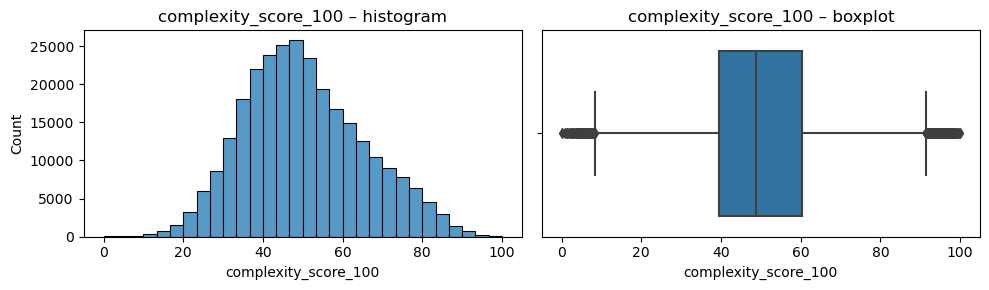

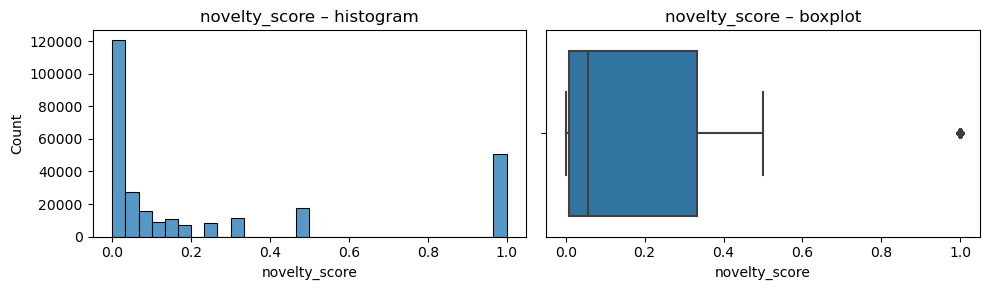

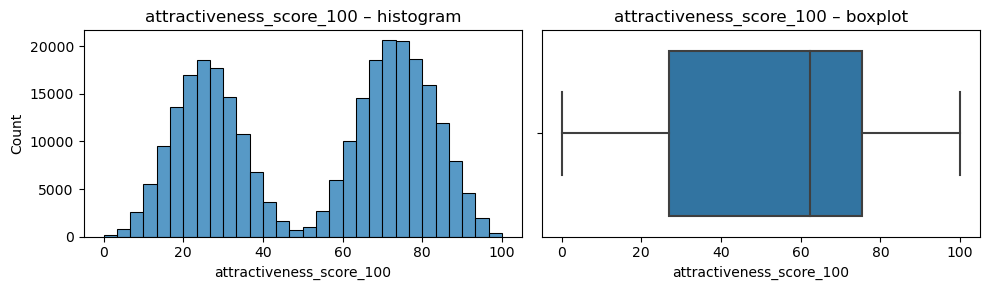

In [13]:
# histogram and box
for c in cols:
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))

    sns.histplot(df[c], bins=30, ax=ax[0])
    ax[0].set_title(f"{c} – histogram")
    ax[0].set_xlabel(c)

    sns.boxplot(x=df[c], ax=ax[1])
    ax[1].set_title(f"{c} – boxplot")
    ax[1].set_xlabel(c)

    plt.tight_layout()
    plt.show()